In [1]:
%run CINIC_10_dataset.ipynb
import tarfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## The path to The data directory

In [2]:
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)

In [3]:
data_directory = os.path.sep.join([data_directory,  'cinic10'])

In [4]:
if not os.path.exists(data_directory):
    tar = tarfile.open(downloaded_file_location)
    tar.extractall(data_directory)

## Load all Images paths Using Tensorflow.data.Dataset API

In [5]:
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
ds_images = tf.data.Dataset.list_files(data_pattern)

In [6]:
len(ds_images)

270000

## Meta Data of Single Image

In [8]:
for file_path in ds_images.take(1):
    image_path = file_path.numpy()
image = tf.io.read_file(image_path)
image = tf.image.decode_png(image,channels=3)
image = image.numpy()

In [9]:
type(image)

numpy.ndarray

In [10]:
image.shape

(32, 32, 3)

In [11]:
image.size

3072

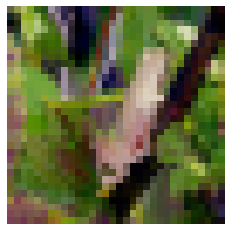

In [12]:
plt.axis('off')
plt.imshow(image/ 255.0)

##  Load a batch of images

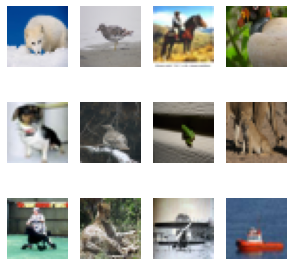

In [16]:
plt.figure(figsize=(5, 5))
for index, image_path in enumerate(ds_images.take(12), start=1):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image,np.float32)
    ax = plt.subplot(3, 4, index)
    plt.imshow(image)
    plt.axis('off')
plt.show()
plt.close()